In [37]:
import pandas as pd
import numpy as np
import pandas as pd
local_file="twitter_sentiments_data.csv"
data_set = pd.read_csv(local_file,sep=',',index_col=0,header=None,engine='python',error_bad_lines=False)
def read_csv(csv_file_name, split_word=False):

    data = []
    with open(csv_file_name) as csv:
        lines = csv.readlines()
        for line in lines:
            line_list = line.split(",")
            positive = int(line_list[1])
            tweet = line_list[2]
            if split_word:
                tweet = tweet.split(" ")
            data.append([positive, tweet])

    return data

In [38]:
from operator import itemgetter
y=read_csv('0_train.csv')
y_train=list(map(itemgetter(0), y))
x_train=list(map(itemgetter(1), y))
label=list(data_set.index[1:][1:])
review = data_set[5][1:].values
x=read_csv('0_test.csv')
y_test=list(map(itemgetter(0), x))
x_test=list(map(itemgetter(1), x))

In [39]:
print(len(y_test))
print(len(x_test))
print(len(y_train))
print(len(x_train))

262022
262022
1048084
1048084


In [40]:
print(y_train[:20])

[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]


In [41]:
y_train=np.array([y_train]).T.astype(float)
y_test=np.array([y_test]).T.astype(float)

In [42]:
print(y_train)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]


In [43]:
print(x_train[:20])

['my princess is having a hannah montana sleepover im all alone damn i need a puppy\n', 'USER_MENTION wind just messes with my hayfever\n', 'reliving conor oberst show memories i miss it\n', 'USER_MENTION i like the name\n', 'USER_MENTION ahh thanks by the way\n', 'ilse wont be home for another hour\n', 'USER_MENTION nopee this time around it looks much better no bedding overload anyway last day work tmrw enjoy\n', 'rain rain go away\n', 'USER_MENTION my state is tamaulipas next to the golfo de mex border with south tx.and about the is all over the world my dear\n', 'USER_MENTION lets be noice cream friends poor us\n', 'off to bed goodnight tweets\n', 'ive manged to crack the screen on my mac\n', 'USER_MENTION give me and ill give you a case of salsa4change\n', 'hmm on da weekend i can be online at say my time and your time make sense well\n', 'USER_MENTION my apologies\n', 'USER_MENTION some mellow beasties u thx yr props URL\n', 'USER_MENTION its addictive\n', 'USER_MENTION didnt eve

In [44]:
print("test_y.shape = " + str(y_test.shape))
print("train_y.shape = " + str(y_train.shape))

test_y.shape = (262022, 1)
train_y.shape = (1048084, 1)


In [45]:
import re
import string
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer


def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and 
                word not in string.punctuation):
            stem_word = stemmer.stem(word) 
            tweets_clean.append(stem_word)
    return tweets_clean
def build_freqs(tweets, ys):
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [46]:
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples 

In [47]:
freqs = build_freqs(x_train, y_train)
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 193819


In [48]:
print('This is an example of a positive tweet: \n', x_train[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(x_train[0]))

This is an example of a positive tweet: 
 my princess is having a hannah montana sleepover im all alone damn i need a puppy


This is an example of the processed version of the tweet: 
 ['princess', 'hannah', 'montana', 'sleepov', 'im', 'alon', 'damn', 'need', 'puppi']


In [49]:
def sigmoid(z): 
    h = 1/(1+np.exp(-z))
    return h

In [50]:
if (sigmoid(0) == 0.5):
    print('right!')
else:
    print('wrong!')

if (sigmoid(4.92) == 0.9927537604041685):
    print('right!')
else:
    print('wrong!')

right!
right!


In [51]:
-1 * (1 - 0) * np.log(1 - 0.9999) 

9.210340371976294

In [52]:
-1 * np.log(0.0001) 

9.210340371976182

In [53]:
def gradientDescent(x, y, theta, alpha, num_iters):

    m = x.shape[0]
    for i in range(0, num_iters):
        

        z = np.dot(x,theta)
        

        h = sigmoid(z)
        

        J = -1/m * (np.dot(y.T,np.log(h)) + np.dot((1-y).T,np.log(1-h)))


        theta = theta - alpha/m * (np.dot(x.T,(h-y)))
        
    J = float(J)
    return J, theta

In [54]:

np.random.seed(1)

tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)

tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


In [55]:
def extract_features(tweet, freqs):
    word_l = process_tweet(tweet)
    x = np.zeros((1, 3)) 
    x[0,0] = 1 
    for word in word_l:
        x[0,1] += freqs.get((word,1),0)
        x[0,2] += freqs.get((word,0),0)
    assert(x.shape == (1, 3))
    return x

In [56]:
tmp1 = extract_features(x_train[0], freqs)
print(tmp1)

[[1.0000e+00 5.2059e+04 8.0699e+04]]


In [57]:
tmp2 = extract_features('blorb bleeeeb bloooob', freqs)
print(tmp2)

[[1. 0. 0.]]


In [58]:
X = np.zeros((len(x_train), 3))
for i in range(len(x_train)):
    X[i, :]= extract_features(x_train[i], freqs)
Y = y_train
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-10, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.63716511.
The resulting vector of weights is [0.0, 2.27e-05, -3.02e-05]


In [59]:
print(X.shape[0])

1048084


In [60]:
def gradientDescent1(x, y, theta, alpha, num_iters):
    t=[]
    m = x.shape[0]
    for i in range(0, num_iters):
        z = np.dot(x,theta)
        h = sigmoid(z)
        J = -1/m * (np.dot(y.T,np.log(h)) + np.dot((1-y).T,np.log(1-h)))
        theta = theta - alpha/m * (np.dot(x.T,(h-y)))
        t.append(J)
    return t

In [61]:
print(len(x_train))

1048084


In [62]:
val=x_train[0:838467]
y_val=y_train[0:838467]
tra=x_train[838467:1048084]
y_tra=y_train[838467:1048084]

In [97]:
X = np.zeros((len(val), 3))
for i in range(len(val)):
    X[i, :]= extract_features(x_train[i], freqs)
Y = y_val
J = gradientDescent1(X, Y, np.zeros((3, 1)), 1e-11, 30)

In [98]:
X = np.zeros((len(tra), 3))
for i in range(len(tra)):
    X[i, :]= extract_features(x_train[i], freqs)
Y = y_tra
J1 = gradientDescent1(X, Y, np.zeros((3, 1)), 1e-11, 30)

In [99]:
st=[]
for i in range(0,len(J)):
    st.append(J[i][0][0])

In [100]:
st1=[]
for i in range(0,len(J1)):
    st1.append(J1[i][0][0])

In [101]:
import matplotlib.pyplot as plt

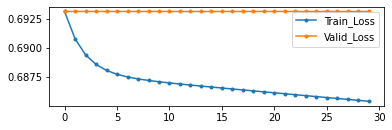

In [102]:
plt.subplot(2, 1, 1)
x2=range(0,30)
plt.plot(x2, st, '.-',label="Train_Loss")
plt.plot(x2, st1, '.-',label="Valid_Loss")
plt.legend(loc='best')

In [103]:
def predict_tweet(tweet, freqs, theta):
    x = extract_features(tweet,freqs)
    y_pred = sigmoid(np.dot(x,theta)) 
    return y_pred

In [104]:
for tweet in ['I am sad', 'You are a good person', 'this movie should have been great.', 'great', 'great great', 'this movie is boring']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am sad -> 0.388439
You are a good person -> 0.569079
this movie should have been great. -> 0.551262
great -> 0.542878
great great -> 0.585129
this movie is boring -> 0.467789


In [105]:
def test_logistic_regression(x_test, y_test, freqs, theta):
    y_hat=[]
    for tweet in x_test:
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            y_hat.append(1)
        else:
            y_hat.append(0)
    cnt=0
    y_test = y_test.squeeze()
    for i in range(0,len(y_hat)):
        if y_hat[i]==y_test[i]:
            cnt+=1
    accuracy = cnt / len(y_hat)
    return accuracy

In [106]:
tmp_accuracy = test_logistic_regression(x_test, y_test, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.6506


In [107]:
def test_logistic_regression1(x_test, y_test, freqs, theta):
    y_hat=[]
    for tweet in x_test:
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            y_hat.append(1)
        else:
            y_hat.append(0)
    return y_hat

In [108]:
pred=test_logistic_regression1(x_test, y_test, freqs, theta)

In [109]:
my_tweet = 'I am happy because I have completed logistic regression!'
y_hat = predict_tweet(my_tweet, freqs, theta)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

Positive sentiment


In [110]:
from sklearn.metrics import classification_report

In [111]:

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.64      0.69      0.66    131142
         1.0       0.66      0.61      0.64    130880

    accuracy                           0.65    262022
   macro avg       0.65      0.65      0.65    262022
weighted avg       0.65      0.65      0.65    262022



In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[90696 40446]
 [51100 79780]]


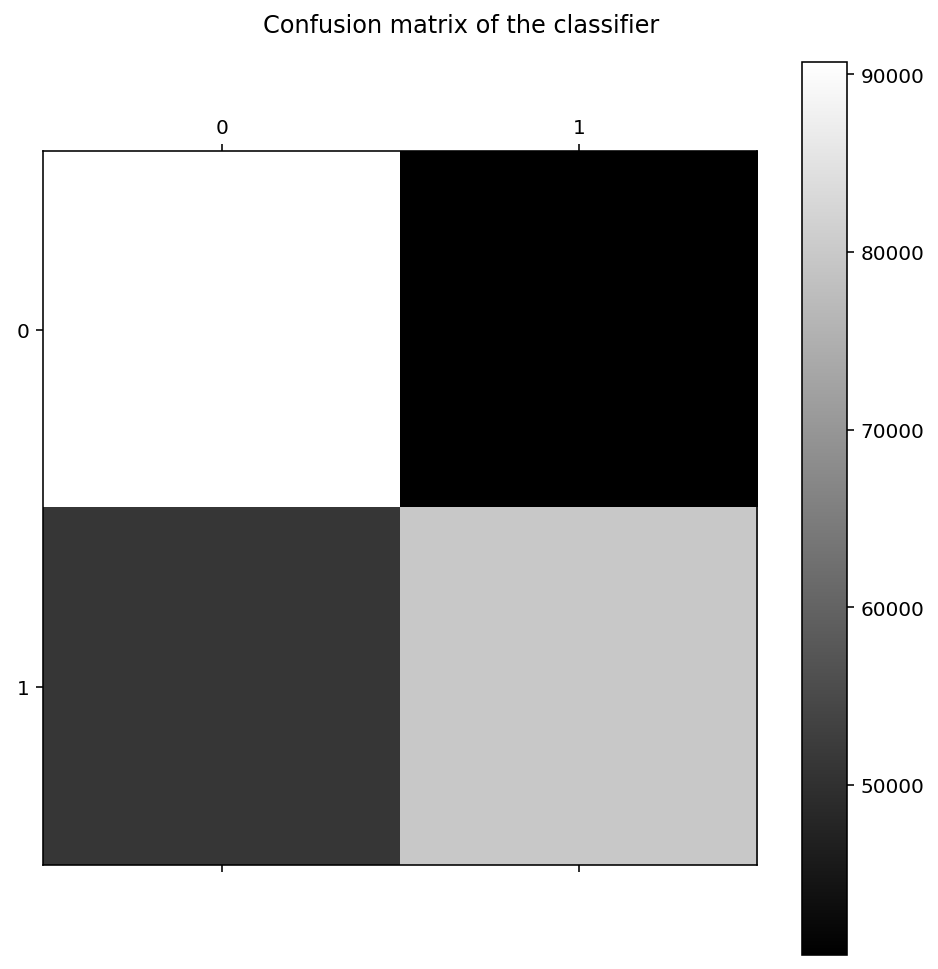

In [113]:
plt.figure(figsize=(8, 8), dpi=144)
plt.title('Confusion matrix of the classifier')
ax = plt.gca()                                  
ax.spines['right'].set_color('none')            
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.matshow(cm, fignum=1, cmap='gray')
plt.colorbar();